#do the necessary installs

In [19]:
%pip install git+https://github.com/delbempedro/ic
%pip install pylatexenc
%pip install qiskit
%pip install qiskit_aer

  Cloning https://github.com/delbempedro/ic to /tmp/pip-req-build-te0p3nya
  Running command git clone --filter=blob:none --quiet https://github.com/delbempedro/ic /tmp/pip-req-build-te0p3nya
  Resolved https://github.com/delbempedro/ic to commit e7a24ed3906901183b193b31b0dc1cefc988c022
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#do the necessary imports

In [20]:
from ic import *
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from matplotlib import pyplot as plt

to defines the quantum circuit with n qbits end m classical bits write
"
my_quantun_circuit = current_circuit(8,5)
"

to add a full adder circuit write
"
my_quantun_circuit.add_full_adder(1,1,0,0,carry_in=True)
"
#First two arguments are the values ​​of the qbits and the other two values ​​are the position of the first qbit and the first classical bit. The argument "carry_in = True" sets the carry in value to 1 (default = 0)

to add a simple adder circuit write
"
my_quantun_circuit.adds_simple_adder(1,1,0,0)
"
#First two arguments are the values ​​of the qbits and the other two values ​​are the position of the first qbit and the first classical bit

to draw the quantun circuit write
"
my_qc = my_quantun_circuit.get_current_circuit()
my_qc.draw(output='mpl',style='iqp')
"

In [30]:
#example
qc = current_circuit(24,15)
qc.add_full_adder(1,1,0,0,carry_in=True)
qc.add_full_adder(1,1,7,5,carry_in=False)
qc.add_full_adder(1,1,14,10,carry_in=False)

to create your token, you need to create a ibm account in
https://quantum.ibm.com/
and your token is "API Token" in the top right corner of the page

In [22]:
#save your ibm account
# save your token to your ibm_quantum account
print("Insert your token:")
my_token = input()
QiskitRuntimeService.save_account(
    overwrite=True,
    channel="ibm_quantum",
    token=my_token
)

Insert your token:


In [23]:
#configure your service
service = QiskitRuntimeService()

In [24]:
#define the type of run
print("Select your type of run:\n 1-Real Run \n 2-Simulation With Noise \n 3-Simulation Without Noise")
type_of_run = input()
print("You selected:",type_of_run)

Select your type of run:
 1-Real Run 
 2-Simulation With Noise 
 3-Simulation Without Noise
You selected: 3


In [25]:
#run your circuit and get the data
data = qc.run_circuit(type_of_run,service)

In [26]:
#filter data
print("Insert your threshold to data filter")
threshold = int(input())
print("You insert",threshold)
filtered_data = {key: value for key, value in data.items() if value > threshold}

Insert your threshold to data filter
You insert 0


In [27]:
#set graph title
print("Insert graph title:")# something like: "Full Adders (inputs: 1,1 carry in 0)"
title = input()
print(title)

Insert graph title:
teste


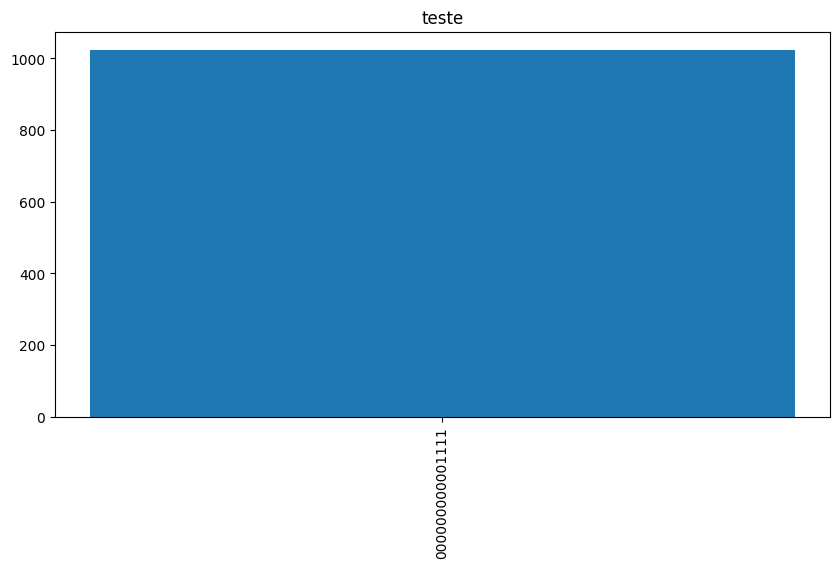

In [28]:
#plot your histogram with results and save image
names = list(filtered_data.keys())
values = list(filtered_data.values())

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title(title)
plt.bar(names, values, tick_label=names)
plt.show()

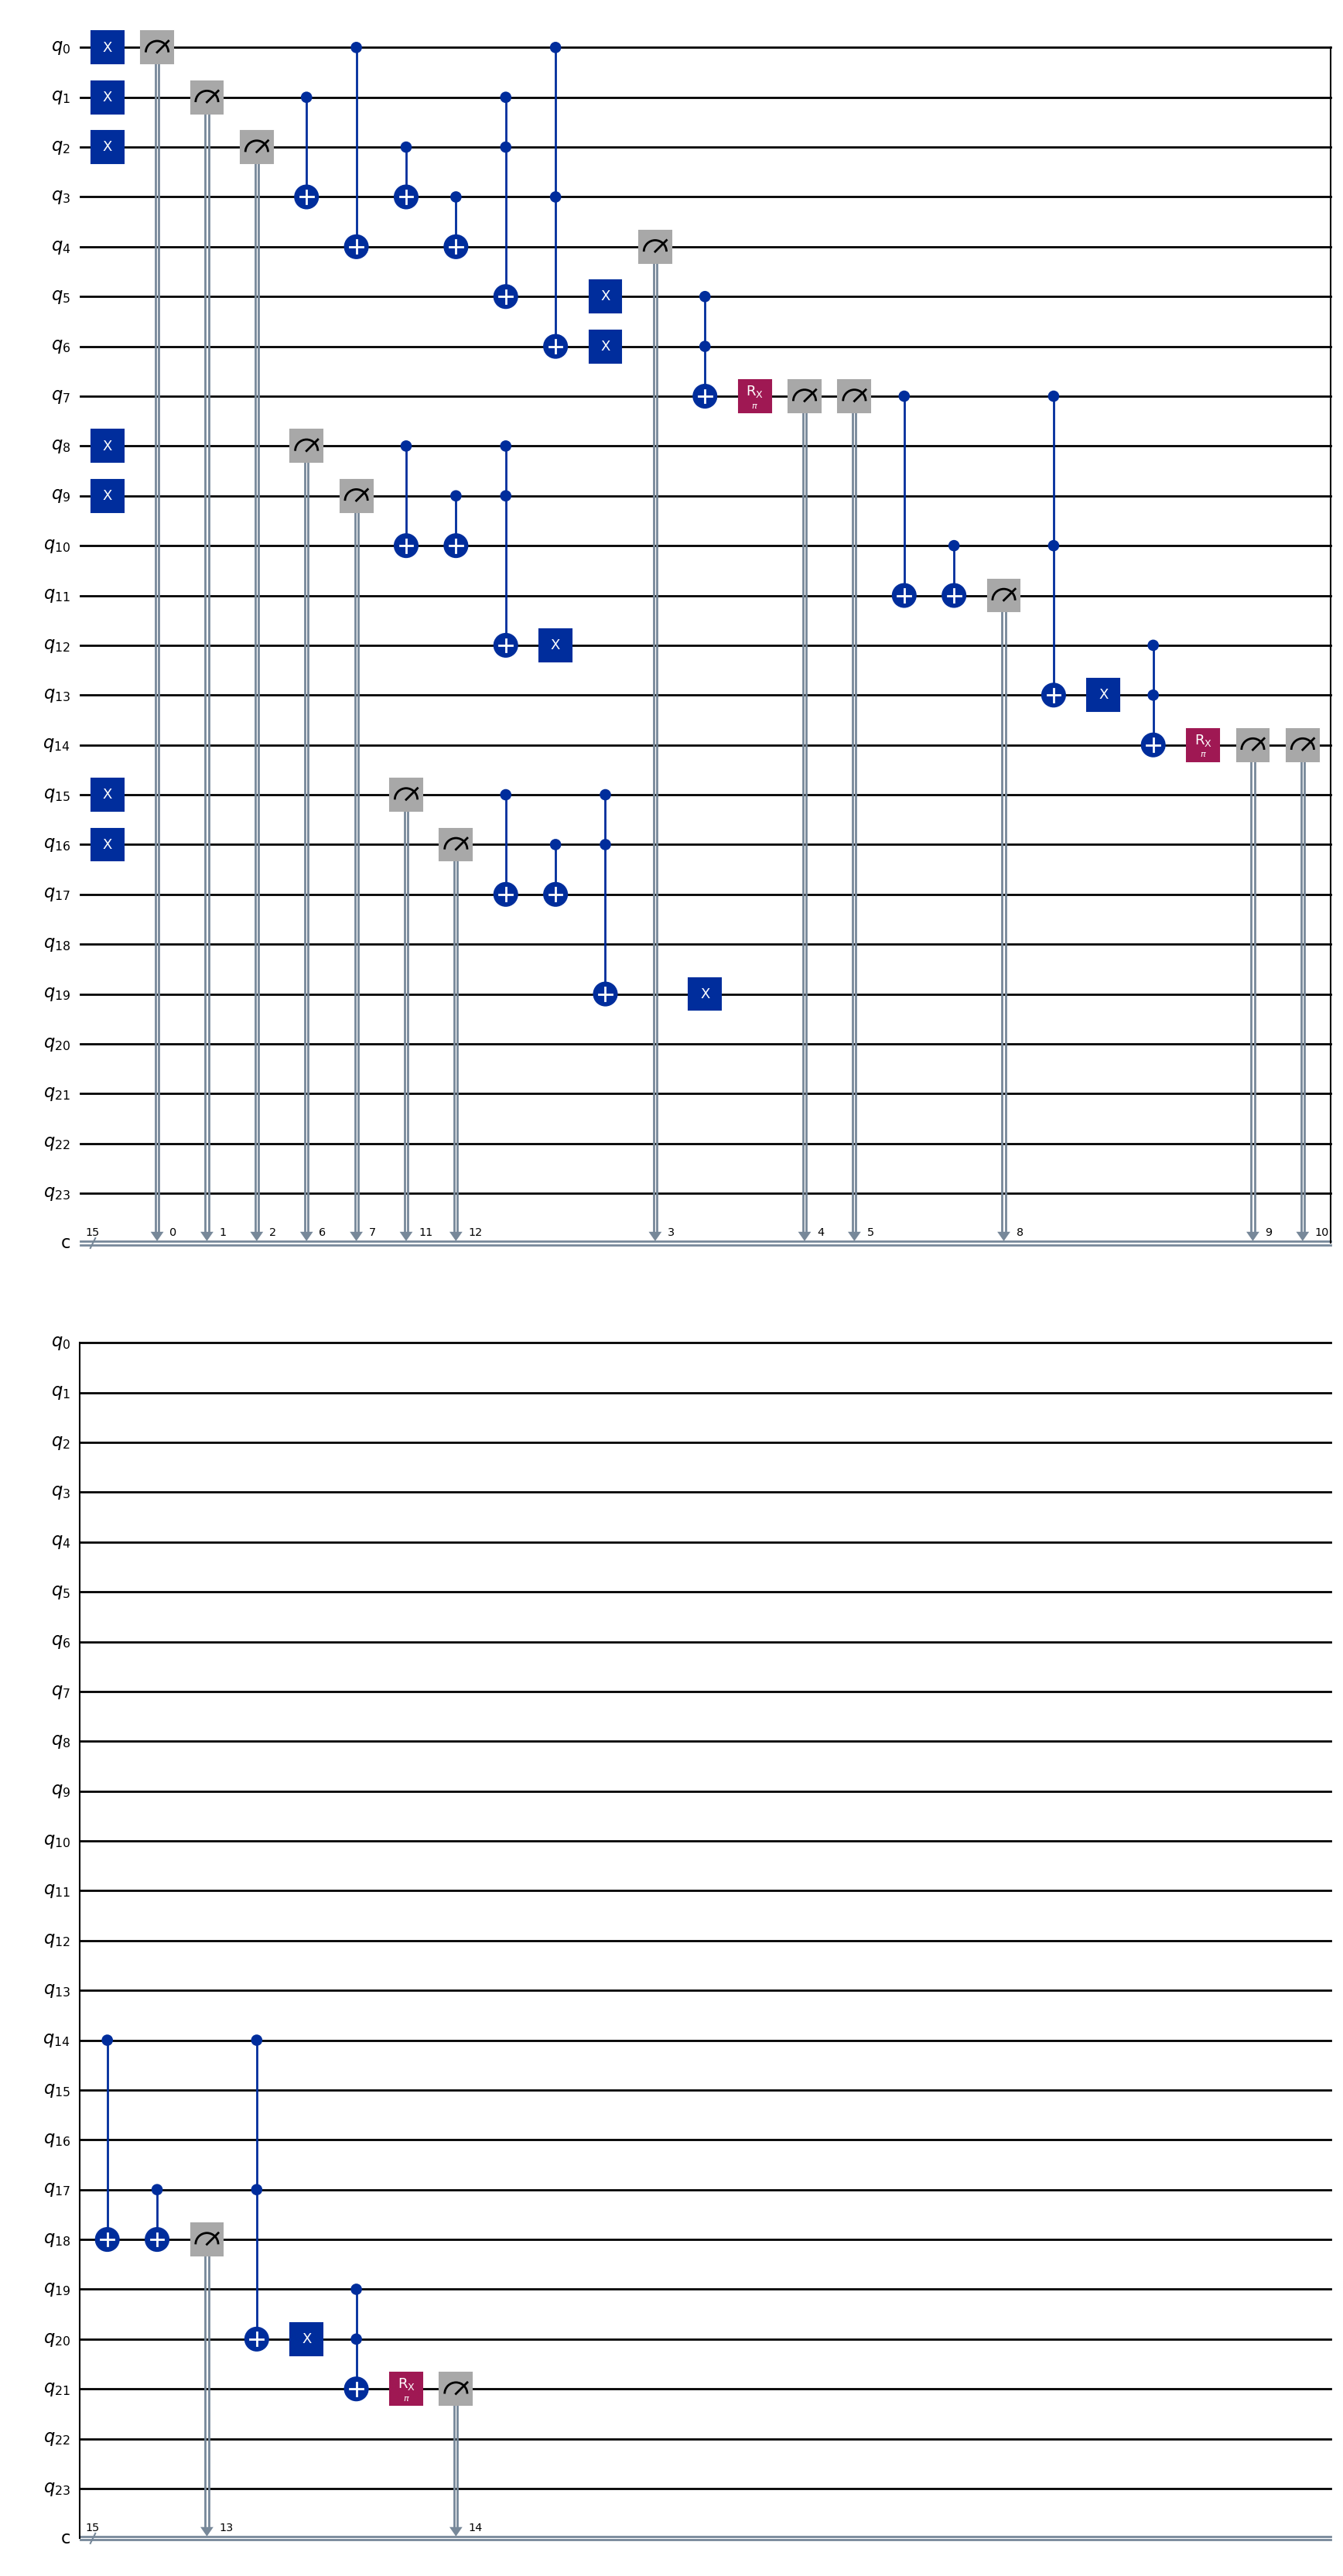

In [31]:
#visualize your circuit
qc.get_current_circuit().draw(output='mpl',style='iqp')